# Messi data exploration

<!-- Written report for this analysis can be found [here](../reports/messi_01_finding_leo.md) -->

In [1]:
# from statsbombpy import sb
import statsbomb as sb

In [2]:
comps = sb.Competitions().get_dataframe()
comps.describe(include="all")

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
count,37.000000,37.000000,37,37,37,37,37,37
unique,NaN,NaN,5,7,2,20,9,8
top,NaN,NaN,Spain,La Liga,male,2018/2019,2020-07-29T05:00,2020-07-29T05:00
freq,NaN,NaN,16,16,33,3,22,28
mean,17.729730,25.675676,NaN,NaN,NaN,NaN,NaN,NaN
std,13.251098,16.721666,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,11.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,16.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,16.000000,39.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
comps[comps.country_name == "Spain"].describe(include="all")

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
count,16.0,16.000000,16,16,16,16,16,16
unique,NaN,NaN,1,1,1,16,3,3
top,NaN,NaN,Spain,La Liga,male,2008/2009,2020-07-29T05:00,2020-07-29T05:00
freq,NaN,NaN,16,16,16,1,14,14
mean,11.0,25.750000,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,13.786467,NaN,NaN,NaN,NaN,NaN,NaN
min,11.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,11.0,21.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,11.0,25.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,11.0,38.250000,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\adeacon\\Documents\\GitHub\\the-ball-is-round\\notebooks'

In [6]:
os.chdir("../data/raw/stb/competitions/")

In [7]:
sb.Competitions().save_data()

In [8]:
sb.Matches(event_id=11, season_id=42).get_dataframe().head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee
0,303421,2020-07-19,17:00:00.000,11,42,206,217,0,5,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",38,"{'id': 1, 'name': 'Regular Season'}","{'id': 348, 'name': 'Estadio de Mendizorroza',...","{'id': 207, 'name': 'Juan Martínez', 'country'..."
1,303493,2020-06-23,22:00:00.000,11,42,217,215,1,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'..."
2,303516,2020-06-27,17:00:00.000,11,42,209,217,2,2,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",32,"{'id': 1, 'name': 'Regular Season'}","{'id': 653, 'name': 'Abanca-Balaídos', 'countr...","{'id': 451, 'name': 'Guillermo Cuadra', 'count..."
3,303680,2020-07-11,19:30:00.000,11,42,901,217,0,1,available,2020-12-18T12:10:38.985394,"{'data_version': '1.1.0', 'shot_fidelity_versi...",36,"{'id': 1, 'name': 'Regular Season'}","{'id': 622, 'name': 'Estadio Municipal José Zo...","{'id': 180, 'name': 'Antonio Mateu', 'country'..."
4,303532,2020-06-16,22:00:00.000,11,42,217,205,2,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",29,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 207, 'name': 'Juan Martínez', 'country'..."


In [13]:
for season_id in comps[comps.country_name == "Spain"].season_id.values:
#     print(season_id)
    mats = sb.Matches(event_id=11, season_id=season_id)
    event_ids = mats.get_dataframe().match_id.values
    print(season_id, event_ids)
    os.chdir("../matches/")
    mats.save_data()
    os.chdir("../events/")
    for event_id in event_ids:
        sb.Events(event_id=str(event_id)).save_data(event_type="shot")

42 [303421 303493 303516 303680 303532 303400 303634 303479 303615 303696
 303664 303596 303487 303600 303548 303473 303610 303652 303430 303674
 303470 303700 303707 303666 303725 303504 303715 303377 303524 303451
 303517 303682 303731]
4 [16157 16136 16215 16248 16056 16289 16079 16149 16275 15973 16317 16131
 16109 16205 16095 16306 16010 15986 16240 15978 16173 16023 16265 16196
 15956 15946 16231 15998 16029 16073 16086 16120 16182 16190]
1 [9592 9870 9783 9609 9700 9860 9695 9794 9717 9620 9673 9650 9799 9827
 9837 9912 9924 9880 9811 9636 9642 9774 9602 9948 9581 9742 9855 9682
 9661 9726 9754 9575 9765 9889 9928 9736]
2 [267212 266669 266892 267220 266989 267670 266516 266357 267039 267058
 266477 267101 266440 266033 267660 266273 267395 266874 266731 266528
 266280 267432 267076 267590 267373 267077 266952 267464 266299 266191
 265952 267492 267596 267569]
27 [267533 266310 266498 267576 266653 265944 265894 265958 267611 267422
 266236 267274 266961 266885 266815 267506 266

In [14]:
# sb.Lineups(event_id="16029").get_dataframe() #.query(team_name == "Barcelona")

In [21]:
# shots = sb.Events(event_id="16029").get_dataframe(event_type="shot")

# shots.info()

In [19]:
import pandas as pd

In [20]:
shots = pd.read_csv("events_16029_shot.csv")

shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   event_type        42 non-null     object 
 1   id                42 non-null     object 
 2   index             42 non-null     int64  
 3   period            42 non-null     int64  
 4   timestamp         42 non-null     object 
 5   minute            42 non-null     int64  
 6   second            42 non-null     int64  
 7   possession        42 non-null     int64  
 8   possession_team   42 non-null     object 
 9   play_pattern      42 non-null     object 
 10  off_camera        0 non-null      float64
 11  team              42 non-null     object 
 12  player            42 non-null     object 
 13  position          42 non-null     object 
 14  duration          42 non-null     float64
 15  under_pressure    6 non-null      object 
 16  statsbomb_xg      42 non-null     float64
 17 

In [22]:
shots[(shots.player == "Lionel Andrés Messi Cuccittini")].T #.head(5)

,3,5
event_type,shot,shot
id,d7a45557-acce-491d-9acb-348aa4b9f92d,09342f5a-82e2-4fd8-9487-09b1aed195af
index,423,520
period,1,1
timestamp,00:08:54.978,00:12:01.361
minute,8,12
second,54,1
possession,22,30
possession_team,Barcelona,Barcelona
play_pattern,Regular Play,From Counter


In [23]:
shots.outcome.value_counts()

Off T      15
Saved      10
Blocked     9
Goal        5
Post        2
Wayward     1
Name: outcome, dtype: int64

In [24]:
shots.type.value_counts()

Open Play    40
Penalty       1
Free Kick     1
Name: type, dtype: int64

In [25]:
shots.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
event_type,42,1,shot,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,42,42,ce84808e-8326-4812-b76b-5b3d66e20c79,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
index,42,NaN,NaN,NaN,2066.43,1022.45,120,1401.25,2273,2858.5,3455
period,42,NaN,NaN,NaN,1.61905,0.491507,1,1,2,2,2
timestamp,42,42,00:15:20.742,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minute,42,NaN,NaN,NaN,53.5476,26.9265,2,38,58.5,72.75,91
second,42,NaN,NaN,NaN,29.3571,16.3376,0,17.5,28,41,58
possession,42,NaN,NaN,NaN,131.429,66.8129,6,85.25,150,181.25,221
possession_team,42,2,Barcelona,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
play_pattern,42,9,Regular Play,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


https://towardsdatascience.com/advanced-sports-visualization-with-pandas-matplotlib-and-seaborn-9c16df80a81b

In [27]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage

<AxesSubplot:xlabel='index', ylabel='statsbomb_xg'>

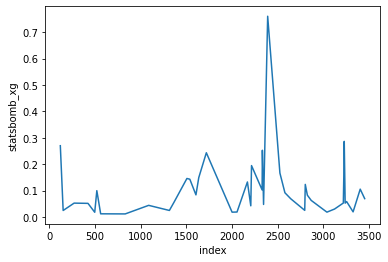

In [60]:
sns.lineplot(data=shots, x="index", y="statsbomb_xg")

In [58]:
def draw_pen_box(ax):
    # size of the pitch is 120, 80

    #Penalty Area
    plt.plot([57.8,57.8],[120,105.4],color="black")
    plt.plot([57.8,22.5],[105.4,105.4],color="black")
    plt.plot([22.5,22.5],[120, 105.4],color="black")

    #6-yard Box
    plt.plot([48,48],[120,115.1],color="black")
    plt.plot([48,32],[115.1,115.1],color="black")
    plt.plot([32,32],[120,115.1],color="black")

    #Penalty spot and the "D"
    topPenSpot = plt.Circle((40,110.3),0.71,color="black")
    ax.add_patch(topPenSpot)
    topDArc = Arc((40,110.3),height=16.2,width=16.2,angle=0,theta1=220,theta2=320,color="black")
    ax.add_patch(topDArc)
    
    #Goal line
    ax.axhline(y=120,color="black")

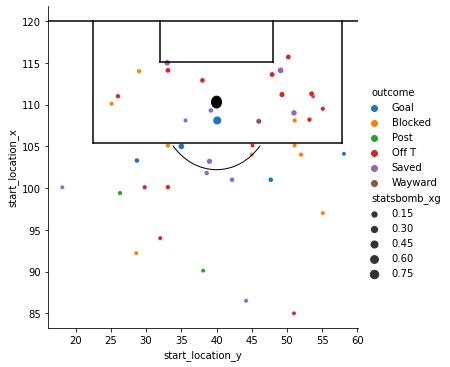

In [59]:
# fig = plt.figure()

# fig.set_size_inches(7, 5)
# ax=fig.add_subplot(1,1,1)
# g = sns.lmplot(x='start_location_x', y='start_location_y', size='statsbomb_xg', 
#            hue='team', data=shots, fit_reg=False, 
#            x_jitter=0.1, y_jitter=0.1, markers="o", palette="viridis") #, height=7)

g = sns.relplot(x='start_location_y', y='start_location_x', size='statsbomb_xg', hue="outcome",
#             sizes=(100, 400), alpha=.5, palette="muted", aspect=1.2,
#             height=7, 
                data=shots)

ax = plt.gca()
draw_pen_box(ax)

plt.show()

In [53]:
def draw_posts(ax):
    
    ## 24ft x 8ft
    x1 = 36.
    x2 = 44.
    y1 = 0.
    y2 = (x2 - x1) * 8. / 24.
    
    x=[x1, x1, x2, x2]
    y=[y1, y2, y2, y1]
    
    plt.plot(x, y, color="black")
    ax.axhline(y=0,color="black")

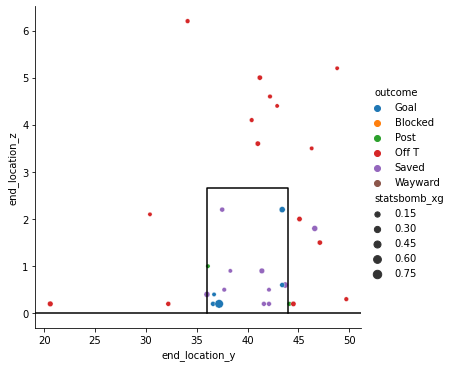

In [54]:
sns.relplot(x='end_location_y', y='end_location_z', size='statsbomb_xg', hue="outcome",
#             sizes=(50, 400), alpha=.5, palette="muted", aspect=1.2,
#             height=7, 
                data=shots)

ax = plt.gca()
draw_posts(ax)
plt.show()